In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, metrics
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score, make_scorer
from sklearn.model_selection import StratifiedKFold, train_test_split
import pandas as pd


In [2]:
df=pd.read_csv('RowFinal1.csv')
A=df.drop('Label',axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(A, df.Label, test_size=0.3, random_state=4)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6863556218635563
Precision: 0.6769352290679305
Recall: 0.703131409818132


[[4979 2454]
 [2171 5142]]


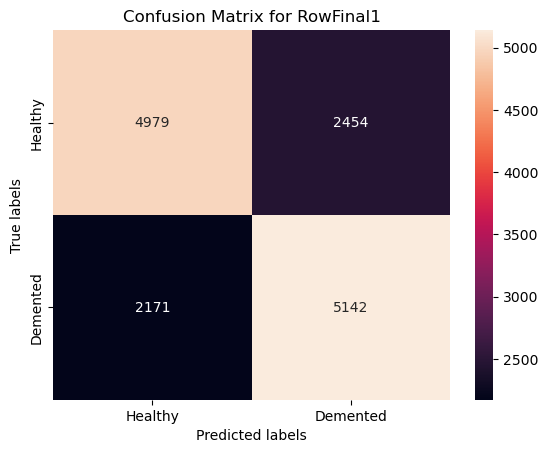

In [4]:
from sklearn.metrics import confusion_matrix as cm

m2 = cm(y_test,y_pred)
print(m2)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


ax= plt.subplot()
sns.heatmap(m2, annot=True, fmt='g', ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for RowFinal1'); 
ax.xaxis.set_ticklabels(['Healthy', 'Demented']); ax.yaxis.set_ticklabels(['Healthy', 'Demented']);

In [5]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# cv=10 represents the StratifiedKFold with 10 folds
x1=[];
def cls_rep(y_true,y_pred):
    
    print ('\n\nCross validation metrics :\n'
           
           
           ,classification_report(y_true, y_pred))
    x1.append(classification_report(y_true, y_pred, output_dict = True, digits = 2))
    
    return accuracy_score(y_true,y_pred)


scores1 = cross_val_score(knn, X=X_train, y=y_train, cv=10, n_jobs=1, scoring = make_scorer(cls_rep))

 
print('Cross Validation scores: %s' % scores1)
 
print('\n\nCross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores1),np.std(scores1)))



Cross validation metrics :
               precision    recall  f1-score   support

         0.0       0.69      0.67      0.68      1714
         1.0       0.68      0.69      0.69      1727

    accuracy                           0.68      3441
   macro avg       0.68      0.68      0.68      3441
weighted avg       0.68      0.68      0.68      3441



Cross validation metrics :
               precision    recall  f1-score   support

         0.0       0.70      0.69      0.69      1714
         1.0       0.69      0.70      0.70      1727

    accuracy                           0.70      3441
   macro avg       0.70      0.70      0.70      3441
weighted avg       0.70      0.70      0.70      3441



Cross validation metrics :
               precision    recall  f1-score   support

         0.0       0.69      0.67      0.68      1714
         1.0       0.68      0.70      0.69      1727

    accuracy                           0.68      3441
   macro avg       0.68      0.68     

In [6]:
print(x1[0])

{'0.0': {'precision': 0.6861226920786182, 'recall': 0.6721120186697783, 'f1-score': 0.6790450928381963, 'support': 1714}, '1.0': {'precision': 0.681044267877412, 'recall': 0.6948465547191662, 'f1-score': 0.6878761822871883, 'support': 1727}, 'accuracy': 0.6835222319093287, 'macro avg': {'precision': 0.6835834799780152, 'recall': 0.6834792866944723, 'f1-score': 0.6834606375626923, 'support': 3441}, 'weighted avg': {'precision': 0.683573886907016, 'recall': 0.6835222319093287, 'f1-score': 0.6834773193649064, 'support': 3441}}


In [7]:
def round_dict(d,k):
    res = dict()
    for key in d:
        res[key]=round(d[key],k)
    return res
        


def parse(d):
    fin = dict()
    i=-1
    k=3
    for key in d:
        i=i+1
        fin[i]=round_dict(key,k)
    fin = pd.DataFrame(fin,index= None)
    return(fin)
 

    
print(x1['0'])
print((parse(x1['0'])))

TypeError: list indices must be integers or slices, not str

In [ ]:
x1 = pd.DataFrame(x1,index=None)

f1 = ["Label:0",parse(x1['0.0'])]
f2 = ["Label:1",parse(x1['1.0'])]
f3 = ["Accuracy",(x1['accuracy'])]
f4 = ["Macro Avg",parse(x1['macro avg'])]
f5 = ["Weighted Avg",parse(x1['weighted avg'])]
f6 = ["Avg Accuracy",'%.3f +/- %.3f' % (np.mean(scores1),np.std(scores1))]
f = (f1,f2,f3,f4,f5,f6)

f = pd.DataFrame(f, columns = ['Types','Rows'], index = None)

print(f.shape)
f.to_csv('KNNRows.csv',index=None)
